In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from multiprocessing import Pool

In [108]:
np.random.seed(seed=0)
qstars = [np.random.normal() for i in range(k)]
print(qstars)

[1.764052345967664, 0.4001572083672233, 0.9787379841057392, 2.240893199201458, 1.8675579901499675, -0.977277879876411, 0.9500884175255894, -0.1513572082976979, -0.10321885179355784, 0.41059850193837233]


In [135]:
reward_options_all = []
for i in range(1000):
    reward_options_all.append([np.random.normal(loc=qstars[j]) for j in range(k)])
reward_options_all = np.array(reward_options_all)
print(reward_options_all.T[0].shape)

(1000,)


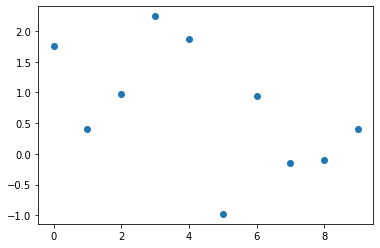

In [136]:
plt.scatter(range(k), qstars)

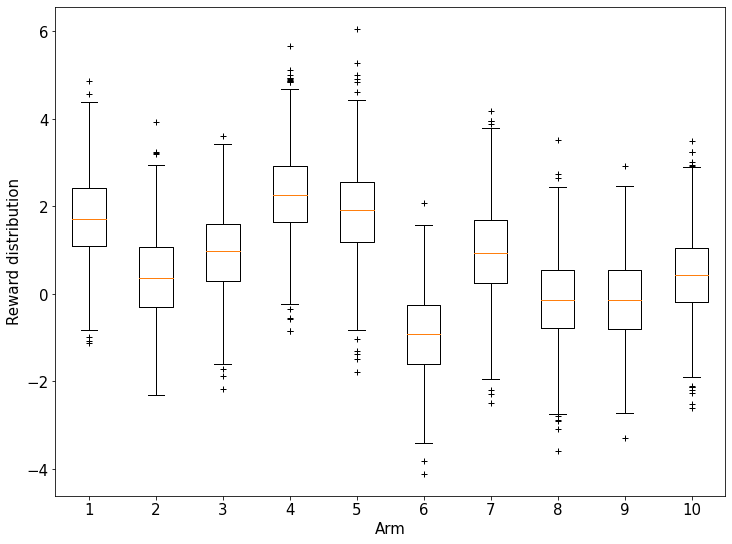

In [171]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111)
ax.boxplot(reward_options_all, sym='+')
ax.tick_params(labelsize=15)
ax.set_xlabel("Arm", fontsize=15)
ax.set_ylabel("Reward distribution", fontsize=15)
fig.savefig("distribution.png")

In [70]:
# There is np.argmax(a), but it only returns a single value
def argmax(a):
    return [i for i, x in enumerate(a) if x == max(a)]

In [71]:
def choose(a):
    if len(a) == 1:
        return a[0]
    else:
        choice = np.random.randint(len(a))
        return a[choice]

In [96]:
# example
e = [1, 1, 2, 3, 5, 5]
a = argmax(e)
print(a)
choose(a)

[4, 5]


4

In [97]:
def greedy(k, T):
#     qstars = [np.random.normal() for i in range(k)]
    q_estimates = np.zeros(k) # Q(a) = 0 for a in range(k)
    counter = np.zeros(k) # N(a) = 0 for a in range(k)
    avg_reward = []

    for i in range(T):
        reward_options = [np.random.normal(loc=qstars[j]) for j in range(k)]
        action_options = argmax(q_estimates) # A = argmax_a Q(a)
        action = choose(action_options) # breaking ties randomly
        reward_this_time = reward_options[action] # R = bandit(A)
        counter[action] += 1 # N(A) = N(A) + 1
        q_estimates[action] += (reward_this_time - q_estimates[action]) / counter[action] # Q(A) = Q(A) + (R - Q(A)) / N(A)
        avg_reward.append(np.average(q_estimates))
    return avg_reward

In [104]:
def epsilon_greedy(k, T, epsilon):
#     qstars = [np.random.normal() for i in range(k)]
    q_estimates = np.zeros(k) # Q(a) = 0 for a in range(k)
    counter = np.zeros(k) # N(a) = 0 for a in range(k)
    avg_reward = []

    for i in range(T):
        reward_options = [np.random.normal(loc=qstars[j]) for j in range(k)]
        rand = np.random.rand() # 0 <= rand < 1, uniform distribution
        if rand < epsilon:
            action = np.random.randint(k) # A = a random action
        else:
            action_options = argmax(q_estimates) # A = argmax_a Q(a)
            action = choose(action_options)
        reward_this_time = reward_options[action] # R = bandit(A)
        counter[action] += 1 # N(A) = N(A) + 1
        q_estimates[action] += (reward_this_time - q_estimates[action]) / counter[action] # Q(A) = Q(A) + (R - Q(A)) / N(A)
        avg_reward.append(np.average(q_estimates))
    return avg_reward

In [116]:
# avg_reward_greedy = []
# for i in range(n_iter):
#     p = multiprocessing.Process(target=greedy, args=(k, T))
#     p.start()
#     avg_reward_greedy.append(p)

In [122]:
# avg_reward_greedy = np.array(avg_reward_greedy)
# print(avg_reward_greedy)

[<Process name='Process-2' pid=689 parent=388 stopped exitcode=0>
 <Process name='Process-3' pid=690 parent=388 stopped exitcode=0>
 <Process name='Process-4' pid=691 parent=388 stopped exitcode=0> ...
 <Process name='Process-1999' pid=2686 parent=388 stopped exitcode=0>
 <Process name='Process-2000' pid=2687 parent=388 stopped exitcode=0>
 <Process name='Process-2001' pid=2688 parent=388 stopped exitcode=0>]


In [150]:
k = 10
T = 2000
n_iter = 500
epsilons = [0.1, 0.01]

In [151]:
avg_reward_greedy = np.array([greedy(k, T) for _i in range(n_iter)])

In [152]:
avg_rewards_epsilon_greedy = []
for epsilon in epsilons:
    print(f"epsilon: {epsilon}")
    avg_rewards_epsilon_greedy.append(np.array([epsilon_greedy(k, T, epsilon) for _j in range(n_iter)]))

epsilon: 0.1
epsilon: 0.01


In [153]:
avg_avg_reward_greedy = avg_reward_greedy.mean(axis=0)
avg_avg_rewards_epsilon_greedy = []
for i in range(len(epsilons)):
    avg_avg_rewards_epsilon_greedy.append(avg_rewards_epsilon_greedy[i].mean(axis=0))

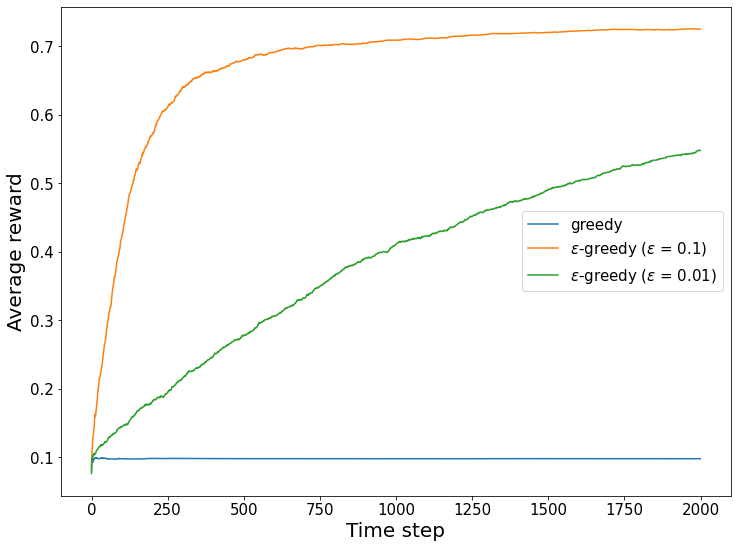

In [164]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111)
ax.plot(np.arange(T), avg_avg_reward_greedy, label="greedy")
for i, epsilon in enumerate(epsilons):
    ax.plot(np.arange(T), avg_avg_rewards_epsilon_greedy[i], label="$\epsilon$-greedy ($\epsilon$ = {})".format(epsilon))
ax.legend(loc="right", fontsize=15)
ax.tick_params(labelsize=15)
ax.set_xlabel("Time step", fontsize=20)
ax.set_ylabel("Average reward", fontsize=20)
fig.savefig("testbed.png")